In [3]:
from experiment import Experiment
import numpy as np
from agent import Agent
from enviroment import Environment
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
# # candidates = ['c1','c2','c3','c4','c5']
# voting_scheme = ['plurality', 'voting_for_two', 'anti_plurality', 'borda']
# strategy = 'combination'
# happiness_type = 'A'
# # number_of_agents = 5

# # agents_options = [3, 5, 10, 25, 50, 100]
# # candidates_options  = [2, 3, 4, 5, 10]


agents_options = [3, 5, 10, 25, 50, 100]
agents_options.reverse()
candidates_options = [3, 4, 5, 6, 7]
voting_schemes = ['plurality', 'voting_for_two', 'anti_plurality', 'borda']
strategy = 'combination'
happiness_types = ['A','B','C']
number_of_strategists = 1
trials = 30

In [5]:
def create_candidate_list(number):
    # Create a list with "c" followed by the candidate number for each candidate
    return ["c" + str(i) for i in range(1, number + 1)]

# Testing the function with number=5
test_list = create_candidate_list(5)
test_list

['c1', 'c2', 'c3', 'c4', 'c5']

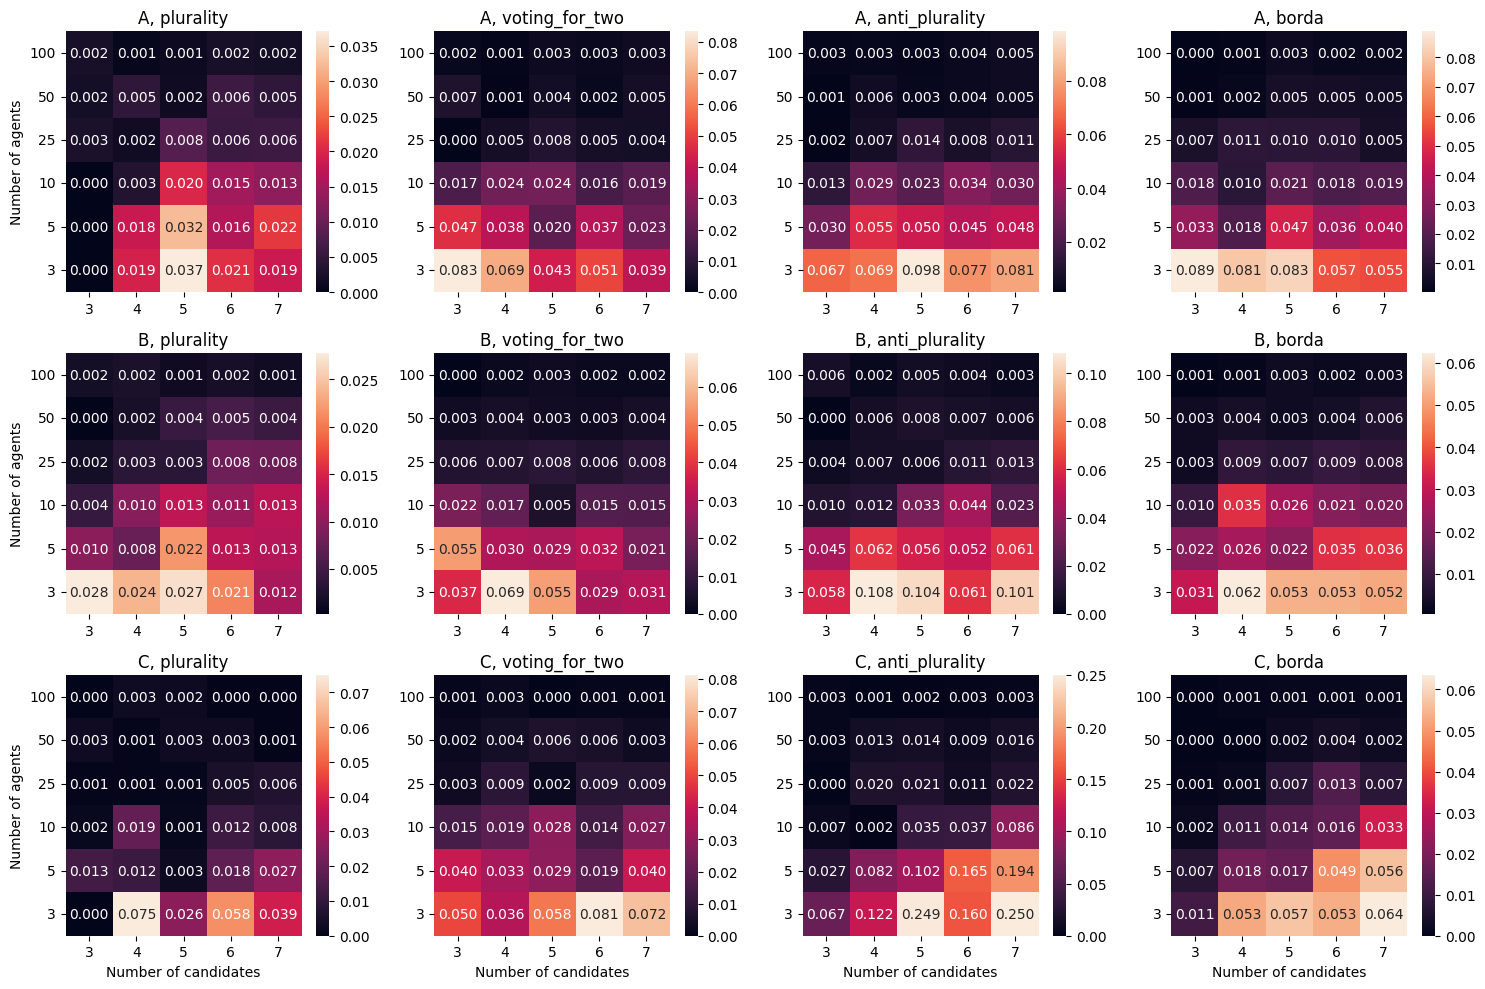

In [4]:
def heatmap_experiment(agents_options, candidates_options, happiness_types, voting_schemes, strategy):
    fig, axs = plt.subplots(len(happiness_types), len(voting_schemes), figsize=(15, 10))
    
    for i, happiness_type in enumerate(happiness_types):
        for j, voting_scheme in enumerate(voting_schemes):
            feature_list_final = []  # Reset for each subplot
            for a in agents_options:
                feature_list = []
                for c in candidates_options:
                    feature = 0
                    for trial in range(30):    
                        print("#"*50)
                        exp = Experiment(id=trial, name=f'{trial}th_experiment')

                        # Set experiment variables
                        exp.set_exp_variables(create_candidate_list(c), voting_scheme, strategy, happiness_type, a,  1)

                        initial_happiness, final_happiness, _, _ = exp.run_exp()

                        feature += abs(final_happiness - initial_happiness)
                        # feature += final_happiness - initial_happiness

                    feature /= a
                    feature /= 30

                    # feature /= (a * 30)
                    feature_list.append(feature)
                
                feature_list_final.append(feature_list)


            # Plotting each heatmap
            sn.heatmap(feature_list_final, annot=True, ax=axs[i, j], fmt=".3f")
            axs[i, j].set_title(f"{happiness_type}, {voting_scheme}")
            axs[i, j].set_xticklabels(candidates_options, rotation=0, fontsize=10)
            axs[i, j].set_yticklabels(agents_options, rotation=0, fontsize=10)
            if j == 0:
                axs[i, j].set_ylabel("Number of agents")
            if i == len(happiness_types) - 1:
                axs[i, j].set_xlabel("Number of candidates")



    plt.tight_layout()
    plt.show()

# # Example usage

heatmap_experiment(agents_options, candidates_options, happiness_types, voting_schemes, strategy)


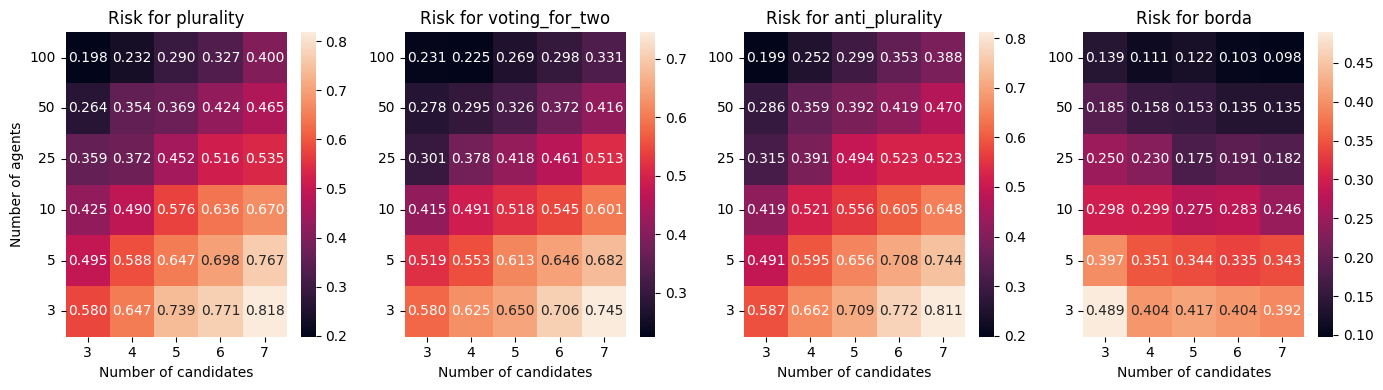

In [6]:
def heatmap_risk(agents_options, candidates_options, voting_schemes, strategy):
    fig, axs = plt.subplots(1, len(voting_schemes), figsize=(14, 4))
    
    for j, voting_scheme in enumerate(voting_schemes):
        risk_list_final = []  # Reset for each subplot
        for a in agents_options:
            risk_list = []
            for c in candidates_options:
                total_risk = 0
                for trial in range(30):    
                    print("#"*50)
                    exp = Experiment(id=trial, name=f'{trial}th_experiment')

                    # Set experiment variables
                    exp.set_exp_variables(create_candidate_list(c), voting_scheme, strategy, 'A', a,  1)
                    _,_,risk,_ = exp.run_exp()

                    total_risk += risk

                total_risk /= 30

                    # feature /= (a * 30)
                risk_list.append(total_risk)
                
            risk_list_final.append(risk_list)

        sn.heatmap(risk_list_final, annot=True, ax=axs[j], fmt=".3f")
        axs[j].set_title(f"Risk for {voting_scheme}")
        axs[j].set_xticklabels(candidates_options, rotation=0, fontsize=10)
        axs[j].set_yticklabels(agents_options, rotation=0, fontsize=10)
        if j == 0:
            axs[j].set_ylabel("Number of agents")
        axs[j].set_xlabel("Number of candidates")
    
    plt.tight_layout()
    plt.show()


heatmap_risk(agents_options, candidates_options, voting_schemes, strategy)

C:\Users\30698\AppData\Local\Temp\ipykernel_304\2066975909.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('topright', labels=voting_schemes)


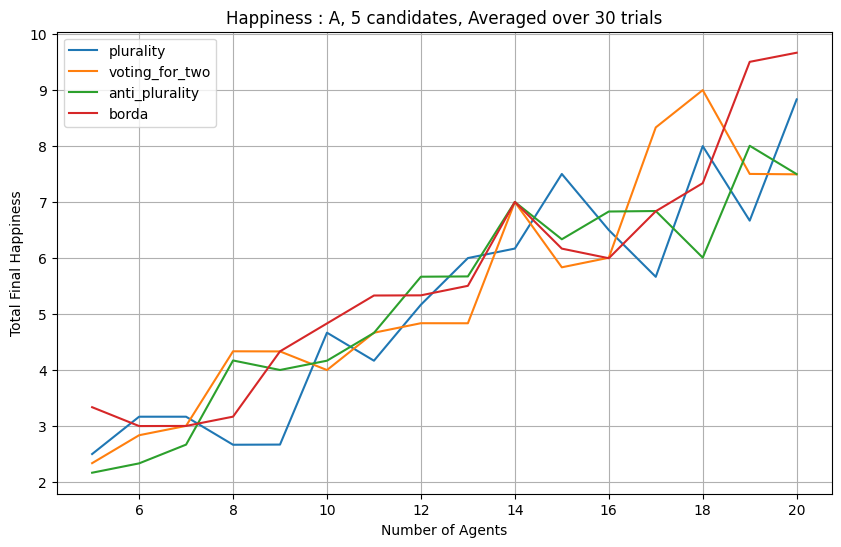

In [13]:
# ALL VOTING SCHEMES 

# initial_list = []
# final_list = []
initial_list_all_schemes = []
final_list_all_schemes = []

for scheme in voting_schemes:
    initial_list = []
    final_list = []
    for i in range(5,21):
        init_hap = 0
        final_hap = 0
        for trial in range(30):
            print("#"*50)
            exp = Experiment(id=i, name=f'{i}th_experiment')

            # Set experiment variables
            exp.set_exp_variables(create_candidate_list(5), scheme, strategy, 'A', i,  number_of_strategists)

            initial_happiness, final_happiness, _, _ = exp.run_exp()

            init_hap += (initial_happiness/30)
            final_hap += (final_happiness/30)
        

        initial_list.append(initial_happiness)
        final_list.append(final_happiness)


    initial_list_all_schemes.append(initial_list)
    final_list_all_schemes.append(final_list)

# Generate x values from 1 up to the number of values
x = np.arange(5, len(initial_list) + 5)
print(x)
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.title(f'Happiness : {happiness_types[0]}, {5} candidates, Averaged over 30 trials')  # Add a title

for strat in range(4):
    # plt.plot(x, initial_list_all_strats[strat])  # Plot the line with circle markers
    plt.plot(x, final_list_all_schemes[strat])  # Plot the line with circle markers

plt.xlabel('Number of Agents')  # Add an x-label
plt.ylabel('Total Final Happiness')  # Add a y-label
plt.grid(True)  # Add gridlines for better readability
plt.legend('topright', labels=voting_schemes)
plt.show()  # Display the plot


C:\Users\30698\AppData\Local\Temp\ipykernel_304\2487923374.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([f"Pref {i}" for i in range(len(candidates)+1)])


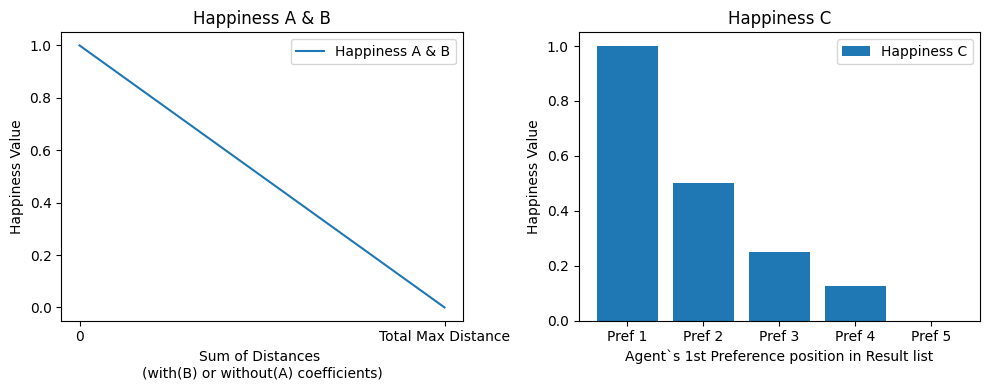

In [37]:
def plot_happiness_functions(candidates):
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Happiness A and B
    total_distance = 10 
    x = np.linspace(0, total_distance, 400)  
    y = 1 - (x / total_distance)

    axs[0].plot(x, y, label='Happiness A & B')
    axs[0].set_title('Happiness A & B')
    axs[0].set_xlabel('Sum of Distances \n(with(B) or without(A) coefficients)')
    axs[0].set_ylabel('Happiness Value')
    # Set the ticks to only the beginning and end of the x-axis, labeling them accordingly
    axs[0].set_xticks([0, total_distance], labels=['0', 'Total Max Distance'])
    axs[0].legend()


    # Happiness C Barplot
    x = np.arange(len(candidates))
    alpha_C = [pow(0.5, i) for i in range(len(candidates))]
    alpha_C[-1] = 0
    C = alpha_C

    axs[1].bar(x, C, label='Happiness C')
    axs[1].set_title('Happiness C')
    axs[1].set_xlabel('Agent`s 1st Preference position in Result list')
    axs[1].set_ylabel('Happiness Value')
    axs[1].set_xticklabels([f"Pref {i}" for i in range(len(candidates)+1)])

    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_happiness_functions(create_candidate_list(5))


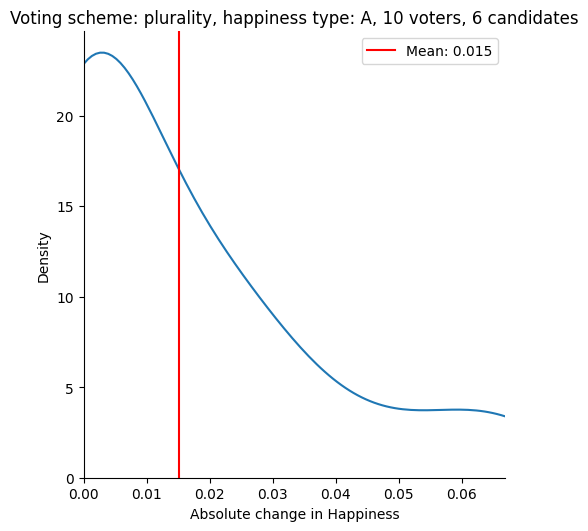

In [114]:
# Absolute difference of total Happiness distribution over {num_trials} experiments
def plot_happiness_distribution(num_of_agents, num_of_candidates, voting_scheme, happiness_type, strategy):
    total_happiness = []
    num_trials = 30
    for trial in range(num_trials):
        print("#"*50)
        exp = Experiment(id=trial, name=f'{trial}th_experiment')

        # Set experiment variables
        exp.set_exp_variables(create_candidate_list(num_of_candidates), voting_scheme, strategy, happiness_type, num_of_agents,  1)

        initial_happiness, final_happiness, _, _ = exp.run_exp()

        feature = abs(final_happiness - initial_happiness)
        # feature += final_happiness - initial_happiness
        feature /= num_of_agents    
        total_happiness.append(feature)
    
    # Plotting
    sn.displot(total_happiness, kind='kde')
    mean_happiness = np.mean(total_happiness)
    std_happiness = np.std(total_happiness)
    
    plt.axvline(mean_happiness, color='r', linestyle='-', label=f'Mean: {mean_happiness:.3f}')
    
    plt.title(f'Voting scheme: {voting_scheme}, happiness type: {happiness_type}, {num_of_agents} voters, {num_of_candidates} candidates')
    plt.xlabel('Absolute change in Happiness')
    plt.xlim(0, max(total_happiness))
    plt.ylabel('Density')
    plt.legend()
    plt.show()


plot_happiness_distribution(10, 6, "plurality", "A", "combination")

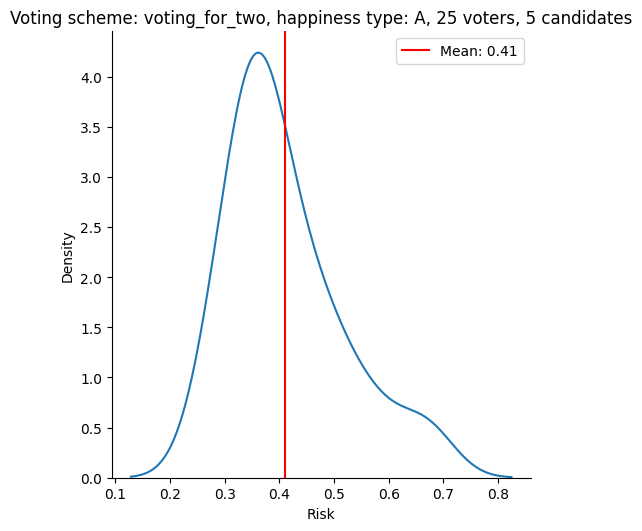

In [115]:
# Risk distribution over num_trials experiments
def plot_risk_distribution(num_of_agents, num_of_candidates, voting_scheme, happiness_type, strategy):
    total_risk = []
    num_trials = 30
    for trial in range(num_trials):
        print("#"*50)
        exp = Experiment(id=trial, name=f'{trial}th_experiment')
        # Set experiment variables
        exp.set_exp_variables(create_candidate_list(num_of_candidates), voting_scheme, strategy, happiness_type, num_of_agents, 1)
        _, _, risk, _ = exp.run_exp()
        total_risk.append(risk)
    
    # Plotting
    sn.displot(total_risk, kind='kde')
    mean_risk = np.mean(total_risk)
    std_risk = np.std(total_risk)
    
    plt.axvline(mean_risk, color='r', linestyle='-', label=f'Mean: {mean_risk:.2f}')
    
    plt.title(f'Voting scheme: {voting_scheme}, happiness type: {happiness_type}, {num_of_agents} voters, {num_of_candidates} candidates')

    plt.xlabel('Risk')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


plot_risk_distribution(25, 5, "voting_for_two", "A", "combination")

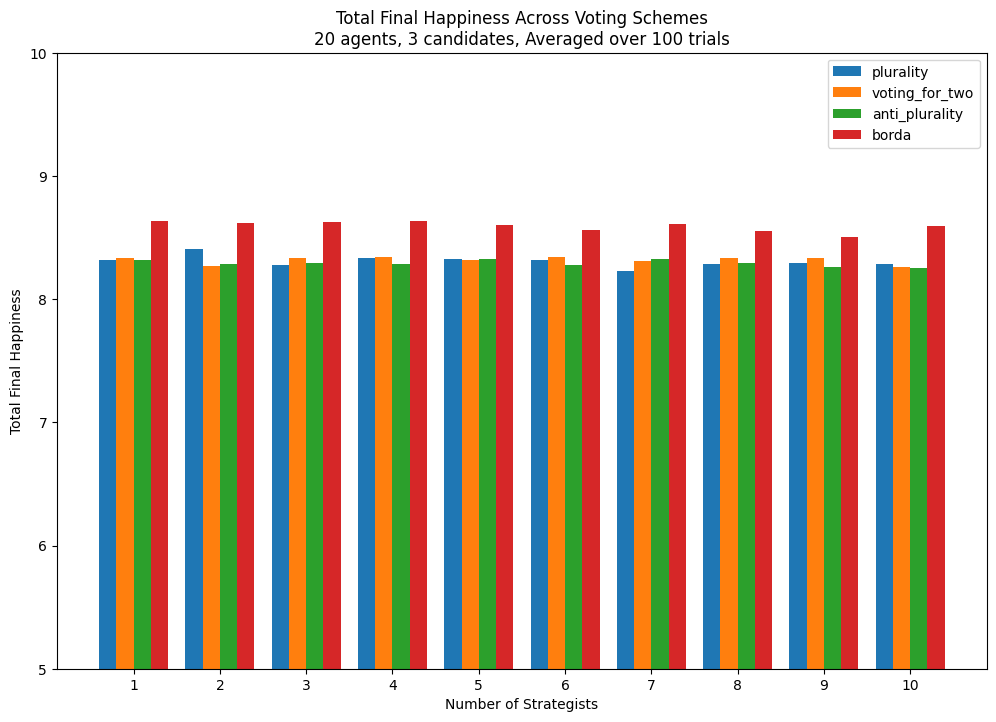

In [130]:
import matplotlib.pyplot as plt
import numpy as np

def plot_many_strategists_combined(num_of_agents, num_of_candidates, voting_schemes, happiness_type, strategy, num_of_strategists):
    num_trials = 100
    plt.figure(figsize=(12, 8))
    width = 0.2  # Width of the bars, adjust as necessary
    # Adjust the positions of the bars for each voting scheme
    positions = np.arange(1, num_of_strategists + 1)
    
    for i, voting_scheme in enumerate(voting_schemes):
        final_list = []
        for s in range(1, num_of_strategists + 1):
            hap = 0
            for trial in range(num_trials):
                print("#" * 50)
                exp = Experiment(id=trial, name=f'{trial}th_experiment')
                exp.set_exp_variables(create_candidate_list(num_of_candidates), voting_scheme, strategy, happiness_type, num_of_agents, s)
                _, final_happiness, _, _ = exp.run_exp()
                hap += final_happiness / num_trials
            final_list.append(hap)
        
        # Offset the x position for each voting scheme to group the bars
        offset_positions = positions - (len(voting_schemes) - 1) * width / 2 + i * width
        plt.bar(offset_positions, final_list, width=width, label=voting_scheme)

    plt.title(f'Total Final Happiness Across Voting Schemes\n{num_of_agents} agents, {num_of_candidates} candidates, Averaged over {num_trials} trials')
    plt.xlabel('Number of Strategists')
    plt.ylabel('Total Final Happiness')
    plt.xticks(positions)
    plt.ylim(5,10)

    plt.legend()
    plt.show()

# Example usage, assuming Experiment and create_candidate_list are defined
plot_many_strategists_combined(20, 3,voting_schemes, 'A', 'combination', 10)


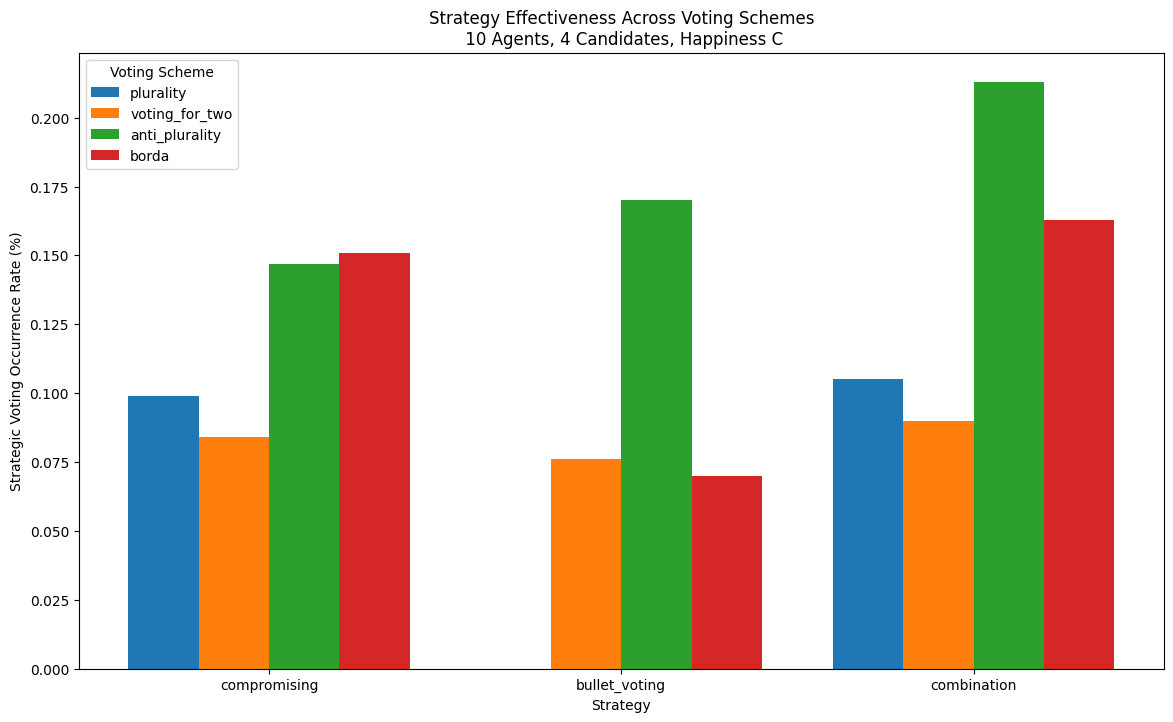

In [14]:
def plot_difference_in_strategies(num_of_agents, num_of_candidates, voting_schemes, happiness_type, strategies):
    num_trials = 1000
    plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
    width = 0.2  # Bar width
    # Generate positions for the strategies on the x-axis
    positions = np.arange(len(strategies))
    
    for i, voting_scheme in enumerate(voting_schemes):
        final_list = []
        for strategy in strategies:
            strats_occured = 0
            for trial in range(num_trials):
                print("#" * 50)
                exp = Experiment(id=trial, name=f'{trial}th_experiment')
                exp.set_exp_variables(create_candidate_list(num_of_candidates), voting_scheme, strategy, happiness_type, num_of_agents, 1)
                _, _, _, strat_occured = exp.run_exp()
                strats_occured += 1 if strat_occured else 0
            final_list.append(strats_occured / num_trials)  # Convert to a percentage or keep as count

        # Offset the positions for each voting scheme
        offset_positions = positions - (len(voting_schemes) - 1) * width / 2 + i * width
        plt.bar(offset_positions, final_list, width=width, label=voting_scheme)

    plt.title(f'Strategy Effectiveness Across Voting Schemes\n {num_of_agents} Agents, {num_of_candidates} Candidates, Happiness {happiness_type}')
    plt.xticks(positions, labels=strategies)
    plt.xlabel('Strategy')
    plt.ylabel('Strategic Voting Occurrence Rate (%)')
    plt.legend(title='Voting Scheme')
    plt.show()

# Example usage
plot_difference_in_strategies(10, 4, voting_schemes, 'C', ['compromising', 'bullet_voting', 'combination'])
